<a href="https://colab.research.google.com/github/DaisyIpatzi/daisyipatzi.github.io/blob/main/assets/ML_Artifacts/Individual_Project_Presentation/NNM_For_Object_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports and Loading Dataset

In [7]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Data Analysis

**Basic Statistics**

In [8]:
#Number of images in the training and tets.
print(f'Training data shape: {x_train.shape}')
#Dimensions of each image
print(f'Test data shape: {x_test.shape}')\
#Number of clases and their distribution
print(f'Number of classes: {len(np.unique(y_train))}')

Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)
Number of classes: 10


**Visualizing the data:** Visualizing a few images from each class can give a sense of what the dataset contains.


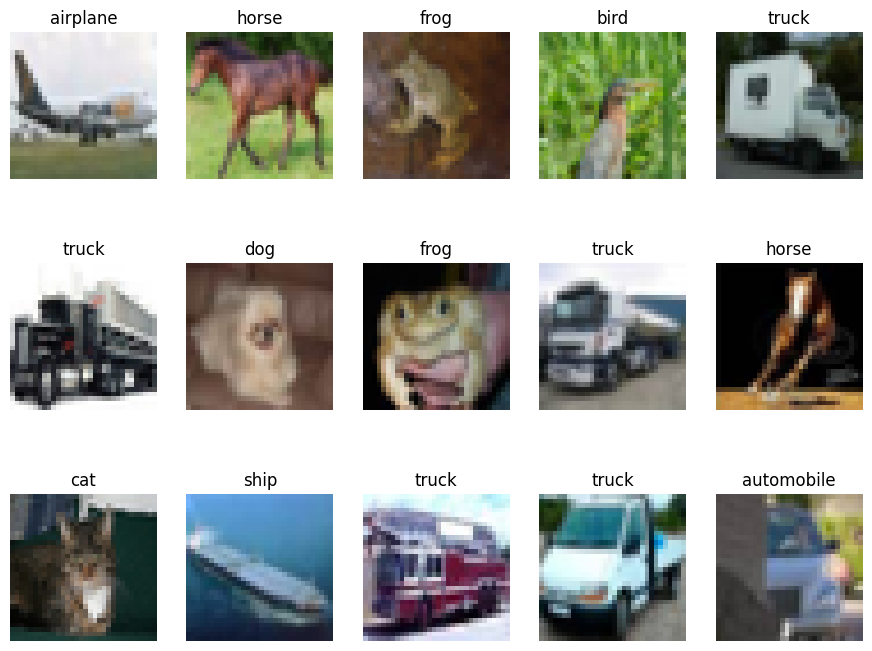

In [9]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

fig, axes = plt.subplots(3, 5, figsize=(11, 8))
axes = axes.ravel()
for i in range(15):
    index = np.random.randint(0, len(x_train))
    axes[i].imshow(x_train[index, :])
    axes[i].set_title(class_names[y_train[index][0]])
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.5)

**Class Distribution:** It's important to check if the dataset is balanced across the classes.
A dataset is considered "balanced" if each class has approximately the same number of samples. In contrast, an "imbalanced" dataset is one where one or more classes have significantly more or fewer samples than the others.

It is important to avoid bias, to ensure training effectiveness; balanced datasets ensure that the model gets enough variety during training, with imbalanced data, the model might not see enough examples of the minority classes to learn effectively.
For highly imbalanced data, since the negative samples occupy a large portion of the entire dataset, the accuracy is not suited to measure the classification performance (Huang et al., 2022).

Text(0, 0.5, 'Count')

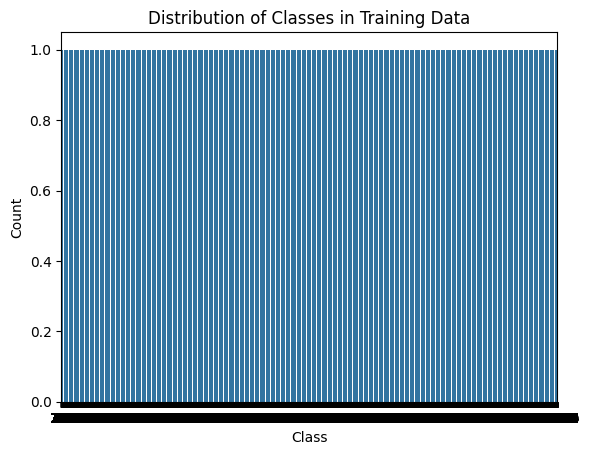

In [10]:
sns.countplot(y_train.ravel())
plt.title('Distribution of Classes in Training Data')
plt.xlabel('Class')
plt.ylabel('Count')


**Pixel Value Distribution:** Understanding the distribution of pixel values can help in further preprocessing, to ensure stable training, robustness, and improved performance.

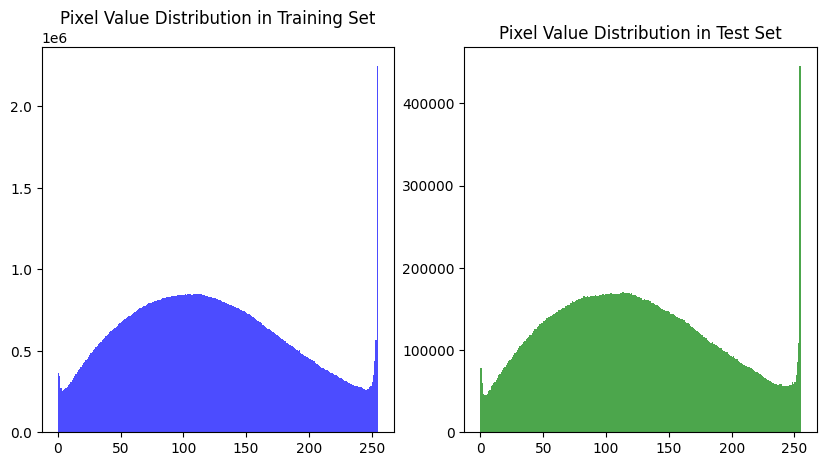

In [11]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(x_train.ravel(), bins=255, color='blue', alpha=0.7)
plt.title('Pixel Value Distribution in Training Set')

plt.subplot(1, 2, 2)
plt.hist(x_test.ravel(), bins=255, color='green', alpha=0.7)
plt.title('Pixel Value Distribution in Test Set')
plt.show()

**Data Analysis Conclusion**

The CIFAR-10 dataset is pretty neat! It includes 60,000 32x32 color images spread across 10 categories like Airplane, Automobile, Bird, Cat, Deer, Dog, Frog, Horse, Ship, and Truck. Each category has a healthy 6,000 images, making sure our models stay unbiased and perform well during training.

Now, let's talk pixels. Originally, their values ranged from 0 to 255, but we usually normalize them to a friendlier 0 to 1 range. Why? Well, this helps our training process go smoother, especially for neural networks using gradient-based optimization methods. Plus, it makes sure those activation functions inside the network do their job effectively.

With its balanced classes and normalized pixel values, CIFAR-10 is the go-to dataset for honing your image classification skills. It's like the playground for developing and testing machine learning magic in the world of computer vision.

# Data Preprocessing and Partitioning CIFAR Dataset


After importing the required libraries and loading the CIFAR-10 dataset, we will partition it into training, validation, and testing sets.

In [12]:
# Normalizing the data: These lines convert the pixel values from integers ranging between 0 to 255 to floats ranging between 0.0 to 1.0.
# This normalization is crucial for neural network performance as it ensures all input features (pixel values) are on a similar scale.
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Converting class vectors to binary class matrices: This step converts the class labels (which are integers from 0 to 9, representing the 10 different classes)
# into binary class matrices. This format is needed for categorical crossentropy, which is a common loss function for classification problems.
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Spliting the training data into training and validation sets: This line splits the training data further into a smaller training set and a validation set
# (80% training, 20% validation by default). Validation sets are used to evaluate the model during training, allowing for the tuning of hyperparameters
# without using the test set.
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Defining Neural Network Arquitecture

We will use a Convolutional Neural Network (CNN) which is highly effective for image classification tasks. The architecture will include convolutional layers, activation functions, pooling layers, dropout layers, and fully connected layers (Jmour, Zayen and Abdelkrim, 2018).

In [13]:
# Importing necessary components for the model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Defining the model: It's called "sequential" because it allows you to create a linear stack of layers,
# where each layer is added one by one in sequence.
# The sequential model is easy to understand and is suitable for many common neural network configurations.
model = Sequential()

# Convolutional layers

# First Layer has 32 filters, each one with 3x3 kernel, same padding and ReLU activation fubnction
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=x_train.shape[1:]))
# Second Layer also has 32 filters with a 3x3 kernel and ReLU activation.
model.add(Conv2D(32, (3, 3), activation='relu'))
# Max-pooling layer (MaxPooling2D), which reduces the spatial dimensions of the feature maps by
# taking the maximum value in small regions. In this case, it uses a 2x2 window to downsample the feature maps.
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout is a regularization technique used during training to prevent overfitting.
# It randomly drops a fraction of the neurons during each training batch.
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Fully connected layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))  # 10 classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary for review
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        36928     
                                                        

**Neural Network Architecture**

Each layer in this CNN model serves a specific purpose, from feature extraction (Conv2D and MaxPooling) to classification (Dense layers), and is designed to gradually abstract and refine the features from the input images for effective classification. The Dropout layers help in reducing overfitting, ensuring that the model generalizes well to new, unseen data.

# Training the Model



In [14]:
# Train the model
history = model.fit(x_train, y_train, batch_size=32, epochs=29, validation_data=(x_val, y_val), shuffle=True)

Epoch 1/29
1250/1250 [==============================] - 168s 133ms/step - loss: 1.5928 - accuracy: 0.4127 - val_loss: 1.2184 - val_accuracy: 0.5691
Epoch 2/29
1250/1250 [==============================] - 166s 133ms/step - loss: 1.2157 - accuracy: 0.5636 - val_loss: 1.0828 - val_accuracy: 0.6137
Epoch 3/29
1250/1250 [==============================] - 165s 132ms/step - loss: 1.0590 - accuracy: 0.6249 - val_loss: 0.9655 - val_accuracy: 0.6597
Epoch 4/29
1250/1250 [==============================] - 164s 132ms/step - loss: 0.9591 - accuracy: 0.6632 - val_loss: 0.8310 - val_accuracy: 0.7052
Epoch 5/29
1250/1250 [==============================] - 165s 132ms/step - loss: 0.8813 - accuracy: 0.6901 - val_loss: 0.7687 - val_accuracy: 0.7317
Epoch 6/29
1250/1250 [==============================] - 165s 132ms/step - loss: 0.8328 - accuracy: 0.7071 - val_loss: 0.8072 - val_accuracy: 0.7180
Epoch 7/29
1250/1250 [==============================] - 164s 132ms/step - loss: 0.7856 - accuracy: 0.7211 - val_

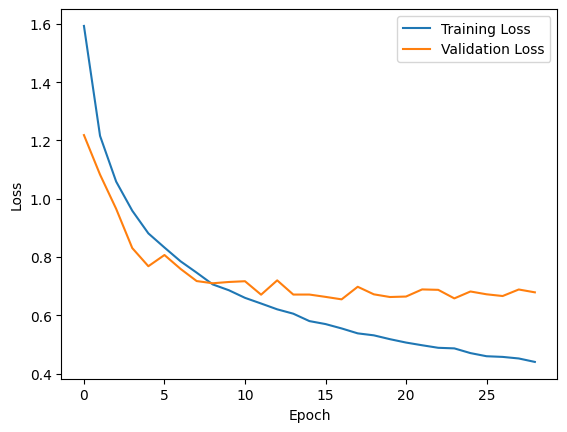

In [15]:
import matplotlib.pyplot as plt

# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Evaluating the Model



In [16]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')


313/313 [==============================] - 11s 34ms/step - loss: 0.7087 - accuracy: 0.7729
Test accuracy: 0.7728999853134155
